In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)


In [2]:
# Read the CSV into a Pandas DataFrame
fantasy_df = pd.read_csv("../Data/predicted2.csv")

# Print the first five rows of data to the screen
fantasy_df.head()

,Player_Name,FD_pos,position,FD_Sal,PFDP,Last_FDP,Rank,pt,rb,as,st,bl,to,trey,FGM,FGA,FTM,FTA
0,Alex_Len,5,C,4400,7.64,16.8,belowAvg,8.725000,5.775000,1.050000,0.50,0.825000,1.000000,0.350,3.300000,6.125000,1.275000,2.025000
1,Al-Farouq_Aminu,4,PF,3800,9.72,12.9,belowAvg,4.333333,4.888889,1.166667,1.00,0.444444,0.944444,0.500,1.388889,4.777778,1.055556,1.611111
2,Alfonzo_McKinnie,3,SF,3700,4.06,7.4,benchPlayer,4.125000,2.843750,0.375000,0.50,0.187500,0.593750,0.375,1.625000,3.906250,0.500000,0.718750
3,Andrew_Wiggins,2,SG,7700,21.56,21.5,average,22.675000,5.150000,3.675000,0.65,0.850000,2.425000,2.200,4.175000,10.375000,3.525000,4.875000
4,Anfernee_Simons,1,PG,3500,12.05,16.5,belowAvg,8.920000,2.480000,1.500000,0.34,0.180000,1.000000,1.080,3.360000,8.320000,1.120000,1.400000


In [3]:
fantasy_df.columns

Index(['Player_Name', 'FD_pos', 'position', 'FD_Sal', 'PFDP', 'Last_FDP',
       'Rank', 'pt', 'rb', 'as', 'st', 'bl', 'to', 'trey', 'FGM', 'FGA', 'FTM',
       'FTA'],
      dtype='object')

In [5]:
fantasy_df.corr()['Last_FDP']

FD_pos     -0.081718
FD_Sal      0.691774
PFDP        0.024730
Last_FDP    1.000000
pt          0.698770
rb          0.595502
as          0.660023
st          0.657159
bl          0.348626
to          0.684230
trey        0.493232
FGM         0.665821
FGA         0.646794
FTM         0.606838
FTA         0.615758
Name: Last_FDP, dtype: float64

In [6]:
fantasy_df.corr()['PFDP']

FD_pos      0.086622
FD_Sal      0.064680
PFDP        1.000000
Last_FDP    0.024730
pt          0.105663
rb          0.103122
as         -0.005346
st          0.041954
bl          0.064283
to          0.114821
trey        0.161518
FGM         0.018739
FGA         0.064505
FTM         0.075745
FTA         0.072924
Name: PFDP, dtype: float64

In [7]:
to_drop = ['PFDP', 'GTime(ET)', 'Team pts', 'Opp pts', 'Win', 'TripleD','ADI', 'VMI', 'FGA', 'FG%', 'FTA', 'FT%']

In [7]:
fantasy_df.pivot_table(index='FD_pos', values='Last_FDP', aggfunc=np.mean)

,Last_FDP
FD_pos,
1,18.500000
2,14.040000
3,16.039286
4,14.653571
5,13.973684


In [8]:
fantasy_df.pivot_table(index='FD_pos', values='Last_FDP', aggfunc=np.median)

,Last_FDP
FD_pos,
1,16.70
2,8.90
3,14.70
4,13.65
5,8.90


In [9]:
fantasy_df

,Player_Name,FD_pos,position,FD_Sal,PFDP,Last_FDP,Rank,pt,rb,as,st,bl,to,trey,FGM,FGA,FTM,FTA
0,Alex_Len,5,C,4400,7.64,16.8,belowAvg,8.725000,5.775000,1.050000,0.500000,0.825000,1.000000,0.350000,3.300000,6.125000,1.275000,2.025000
1,Al-Farouq_Aminu,4,PF,3800,9.72,12.9,belowAvg,4.333333,4.888889,1.166667,1.000000,0.444444,0.944444,0.500000,1.388889,4.777778,1.055556,1.611111
2,Alfonzo_McKinnie,3,SF,3700,4.06,7.4,benchPlayer,4.125000,2.843750,0.375000,0.500000,0.187500,0.593750,0.375000,1.625000,3.906250,0.500000,0.718750
3,Andrew_Wiggins,2,SG,7700,21.56,21.5,average,22.675000,5.150000,3.675000,0.650000,0.850000,2.425000,2.200000,4.175000,10.375000,3.525000,4.875000
4,Anfernee_Simons,1,PG,3500,12.05,16.5,belowAvg,8.920000,2.480000,1.500000,0.340000,0.180000,1.000000,1.080000,3.360000,8.320000,1.120000,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Wenyen_Gabriel,4,PF,3500,10.36,2.0,benchPlayer,1.461538,0.846154,0.307692,0.307692,0.230769,0.461538,0.076923,0.461538,1.538462,0.461538,0.769231
128,Yuta_Watanabe,2,SG,3500,3.46,0.0,benchPlayer,1.166667,0.833333,0.000000,0.000000,0.166667,0.166667,0.166667,0.500000,1.000000,0.000000,0.333333
129,Zach_Collins,4,PF,5300,7.58,13.1,belowAvg,9.000000,4.000000,2.000000,0.000000,0.666667,2.000000,1.000000,3.000000,6.333333,2.000000,2.000000
130,Zach_Norvell_Jr.,2,SG,3500,3.89,0.0,benchPlayer,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000


# Kernel Density Analysis


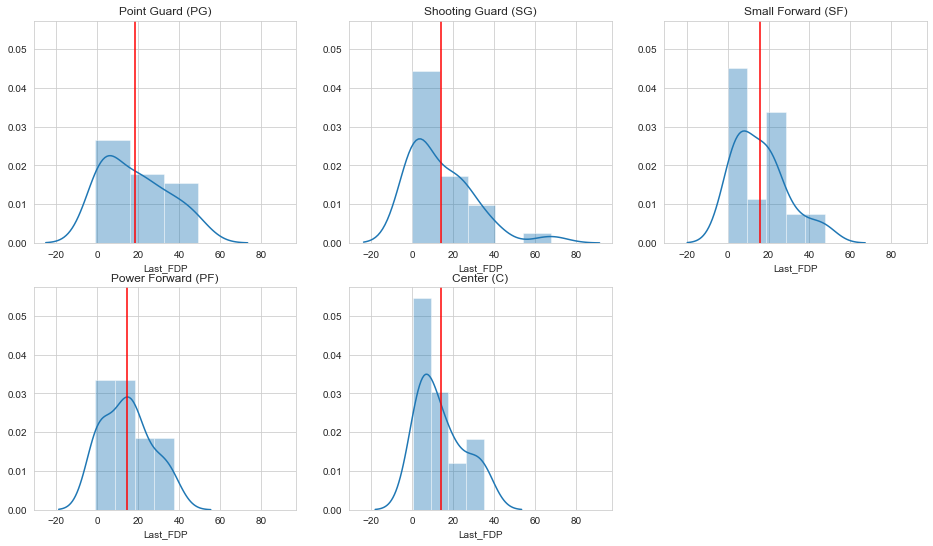

In [10]:
f = plt.figure(figsize=(16,9))

ax1 = f.add_subplot(2,3,1)
ax2 = f.add_subplot(2,3,2,sharex=ax1, sharey=ax1)
ax3 = f.add_subplot(2,3,3,sharex=ax1, sharey=ax1)
ax4 = f.add_subplot(2,3,4,sharex=ax1, sharey=ax1)
ax5 = f.add_subplot(2,3,5,sharex=ax1, sharey=ax1)

ax1.set_title('Point Guard (PG)')
sns.distplot(fantasy_df[fantasy_df.position=='PG'].Last_FDP, label='PG',ax=ax1)
ax1.axvline(np.mean(fantasy_df[fantasy_df.position=='PG'].Last_FDP),color='red', label='mean')

ax2.set_title('Shooting Guard (SG)')
sns.distplot(fantasy_df[fantasy_df.position=='SG'].Last_FDP, label='SG',ax=ax2)
ax2.axvline(np.mean(fantasy_df[fantasy_df.position=='SG'].Last_FDP),color='red', label='mean')

ax3.set_title('Small Forward (SF)')
sns.distplot(fantasy_df[fantasy_df.position=='SF'].Last_FDP, label='SF',ax=ax3)
ax3.axvline(np.mean(fantasy_df[fantasy_df.position=='SF'].Last_FDP),color='red', label='mean')

ax4.set_title('Power Forward (PF)')
sns.distplot(fantasy_df[fantasy_df.position=='PF'].Last_FDP, label='PF',ax=ax4)
ax4.axvline(np.mean(fantasy_df[fantasy_df.position=='PF'].Last_FDP),color='red', label='mean')

ax5.set_title('Center (C)')
sns.distplot(fantasy_df[fantasy_df.position=='C'].Last_FDP, label='C',ax=ax5)
ax5.axvline(np.mean(fantasy_df[fantasy_df.position=='C'].Last_FDP),color='red', label='mean')

plt.show()

# LINEAR MODELING


In [11]:
from pulp import *
prob = pulp.LpProblem('FantasyTeam', pulp.LpMaximize)

In [12]:
decision_variables = []
for rownum, row in fantasy_df.iterrows():
    variable = str('x' + str(rownum))
    variable = pulp.LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
    decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))

Total number of decision_variables: 132


#Optimisation Function

In [13]:
total_points = ""
for rownum, row in fantasy_df.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['Last_FDP']*player
            total_points += formula

prob += total_points
print ("Optimization function: " + str(total_points))

Optimization function: 16.8*x0 + 12.9*x1 + 17.4*x10 + 6.6*x100 + 13.5*x101 + 1.7*x102 + 19.7*x103 + 33.2*x104 + 14.2*x105 + 25.2*x106 + 37.8*x107 + 6.9*x108 + 29.0*x109 + 6.2*x11 + 1.2*x110 + 21.1*x111 + 7.0*x112 - x113 + 9.7*x114 + 4.0*x115 + 19.7*x116 + 20.5*x117 + 4.0*x118 + 16.7*x119 + 27.9*x12 + 19.0*x120 + 2.7*x121 + 12.9*x122 + 19.0*x123 + 4.6*x124 + 6.2*x125 + 17.2*x126 + 2.0*x127 + 13.1*x129 + 34.5*x13 + 37.5*x131 + 3.0*x14 + 22.6*x15 + 2.0*x16 + 7.5*x17 + 22.5*x18 + 3.2*x19 + 7.4*x2 + 49.2*x20 + 8.9*x21 + 21.7*x22 + 7.8*x23 + 28.8*x25 + 12.4*x26 + 34.7*x27 + 33.7*x28 + 12.7*x29 + 21.5*x3 + 34.0*x30 + 39.4*x31 + 6.2*x32 + 2.5*x34 + 18.5*x35 + 34.6*x38 + 45.4*x39 + 16.5*x4 + 6.9*x40 + 2.0*x41 + 43.9*x43 + 3.7*x44 + 4.7*x45 + 19.8*x46 + 0.2*x47 + 26.1*x48 + 6.4*x49 + 6.4*x50 + 1.2*x51 + 34.9*x52 + 5.5*x53 + 67.5*x54 + 14.8*x55 + 17.2*x56 + 1.2*x57 + 11.4*x58 + 13.7*x59 + 21.4*x6 - 0.5*x60 + 22.6*x62 + 2.2*x63 + 20.1*x64 + 13.2*x66 + 33.0*x67 + 6.5*x68 + 15.7*x69 + 4.4*x7 + 22.6*

#Cash Constraint

In [14]:
avail_cash = 60000
total_cost = ""
for rownum, row in fantasy_df.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            formula = row['FD_Sal']*player
            total_cost += formula

prob += (total_cost <= avail_cash)

# Player Constraints

#Point Guard

In [15]:
avail_PG = 2
total_PG = ""
for rownum, row in fantasy_df.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'PG':
                formula = 1*player
                total_PG += formula
prob += (total_PG == avail_PG)
print(total_PG)

x106 + x109 + x113 + x117 + x119 + x121 + x19 + x20 + x22 + x27 + x29 + x30 + x34 + x35 + x4 + x43 + x44 + x45 + x53 + x57 + x60 + x68 + x73 + x77 + x8 + x97 + x98


#Shooting Guard

In [16]:
avail_SG = 2
total_SG = ""
for rownum, row in fantasy_df.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'SG':
                formula = 1*player
                total_SG += formula
prob += (total_SG == avail_SG)
print(total_SG)

x107 + x110 + x115 + x122 + x125 + x128 + x130 + x14 + x15 + x25 + x3 + x31 + x33 + x36 + x47 + x49 + x5 + x54 + x58 + x6 + x61 + x62 + x63 + x65 + x66 + x79 + x87 + x89 + x94 + x95


#Small Forward

In [17]:
avail_SF = 2
total_SF = ""
for rownum, row in fantasy_df.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'SF':
                formula = 1*player
                total_SF += formula
prob += (total_SF == avail_SF)
print(total_SF)

x108 + x111 + x112 + x114 + x116 + x12 + x123 + x16 + x17 + x18 + x2 + x32 + x39 + x42 + x46 + x51 + x59 + x64 + x67 + x69 + x7 + x70 + x76 + x78 + x80 + x81 + x85 + x90


#Power Forward

In [18]:
avail_PF = 2
total_PF = ""
for rownum, row in fantasy_df.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'PF':
                formula = 1*player
                total_PF += formula
prob += (total_PF == avail_PF)
print(total_PF)

x1 + x10 + x102 + x103 + x105 + x120 + x127 + x129 + x13 + x131 + x24 + x26 + x37 + x38 + x40 + x48 + x55 + x56 + x72 + x74 + x75 + x86 + x88 + x91 + x92 + x93 + x96 + x99


#Center

In [19]:
avail_C = 1
total_C = ""
for rownum, row in fantasy_df.iterrows():
    for i, player in enumerate(decision_variables):
        if rownum == i:
            if row['position'] == 'C':
                formula = 1*player
                total_C += formula
prob += (total_C == avail_C)
print(total_C)

x0 + x100 + x101 + x104 + x11 + x118 + x124 + x126 + x21 + x23 + x28 + x41 + x50 + x52 + x71 + x82 + x83 + x84 + x9


# Solving the problem

In [20]:
prob.writeLP('FantasyTeam.lp')
optimization_result = prob.solve()
assert optimization_result == pulp.LpStatusOptimal
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Optimal Solution to the problem:  390.7
Individual decision_variables: 
x0 = 0.0
x1 = 0.0
x10 = 0.0
x100 = 0.0
x101 = 0.0
x102 = 0.0
x103 = 0.0
x104 = 0.0
x105 = 0.0
x106 = 0.0
x107 = 1.0
x108 = 0.0
x109 = 0.0
x11 = 0.0
x110 = 0.0
x111 = 0.0
x112 = 0.0
x113 = 0.0
x114 = 0.0
x115 = 0.0
x116 = 0.0
x117 = 0.0
x118 = 0.0
x119 = 0.0
x12 = 0.0
x120 = 0.0
x121 = 0.0
x122 = 0.0
x123 = 0.0
x124 = 0.0
x125 = 0.0
x126 = 0.0
x127 = 0.0
x128 = 0.0
x129 = 0.0
x13 = 1.0
x130 = 0.0
x131 = 1.0
x14 = 0.0
x15 = 0.0
x16 = 0.0
x17 = 0.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 1.0
x21 = 0.0
x22 = 0.0
x23 = 0.0
x24 = 0.0
x25 = 0.0
x26 = 0.0
x27 = 0.0
x28 = 0.0
x29 = 0.0
x3 = 0.0
x30 = 0.0
x31 = 0.0
x32 = 0.0
x33 = 0.0
x34 = 0.0
x35 = 0.0
x36 = 0.0
x37 = 0.0
x38 = 0.0
x39 = 1.0
x4 = 0.0
x40 = 0.0
x41 = 0.0
x42 = 0.0
x43 = 0.0
x44 = 0.0
x45 = 0.0
x46 = 0.0
x47 = 0.0
x48 = 0.0
x49 = 0.0
x5 = 0.0
x50 = 0.0
x51 = 0.0
x52 = 1.0
x53 = 0.0
x54 = 1.0
x55 = 0.0
x56 = 0.0
x57 = 0.0
x58 = 0.0
x59 = 0.0
x6 = 0

# Results

In [21]:
variable_name = []
variable_value = []

for v in prob.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df = pd.DataFrame({'variable': variable_name, 'value': variable_value})
df = df.dropna()
df


,variable,value
0,x0,0.0
1,x1,0.0
2,x10,0.0
3,x100,0.0
4,x101,0.0
...,...,...
127,x95,0.0
128,x96,0.0
129,x97,0.0
130,x98,0.0


In [23]:
df.to_csv("optimization2.csv")

In [27]:
for rownum, row in df.iterrows():
    value = re.findall(r'\d+', row['variable'])
    df.loc[rownum, 'variable'] = int(value[0])

df

TypeError: cannot use a string pattern on a bytes-like object

In [31]:
#append results
for rownum, row in fantasy_df.iterrows():
    for results_rownum, results_row in df.iterrows():
        if rownum == results_row['variable']:
            fantasy_df.loc[rownum, 'decision'] = results_row['value']

fantasy_df[fantasy_df.decision==1].FD_Sal.sum()
fantasy_df[fantasy_df.decision==1].Last_FDP.sum()
final_df = fantasy_df[fantasy_df.decision==1].sort_values('position').head(10)
final_df


,Player_Name,FD_pos,position,FD_Sal,PFDP,Last_FDP,Rank,pt,rb,as,st,bl,to,trey,FGM,FGA,FTM,FTA,decision
52,Jakob_Poeltl,5,C,4900,5.81,34.9,advanced,5.500000,5.687500,1.833333,0.500000,1.583333,0.791667,0.000000,2.416667,3.895833,0.666667,1.291667,1.0
13,Brandon_Clarke,4,PF,5200,3.80,34.5,advanced,12.166667,5.738095,1.476190,0.523810,0.857143,0.928571,0.428571,4.523810,7.309524,1.547619,1.857143,1.0
131,Zion_Williamson,4,PF,6500,10.02,37.5,advanced,19.500000,8.166667,1.666667,0.500000,0.333333,2.333333,0.666667,8.000000,13.000000,2.833333,5.333333,1.0
20,Chris_Paul,1,PG,7300,4.89,49.2,top,17.122449,5.122449,6.591837,1.612245,0.122449,2.102041,1.591837,5.326531,11.448980,2.918367,3.285714,1.0
77,Lonzo_Ball,1,PG,6600,4.85,47.7,top,11.880952,5.976190,6.642857,1.333333,0.404762,2.880952,2.333333,3.952381,10.428571,0.690476,1.238095,1.0
39,Dorian_Finney-Smith,3,SF,4500,9.34,45.4,top,9.375000,5.562500,1.333333,0.687500,0.541667,0.916667,1.583333,3.312500,7.083333,1.166667,1.645833,1.0
80,Marcus_Morris,3,SF,5700,8.18,36.2,advanced,19.404762,5.500000,1.380952,0.809524,0.404762,1.714286,2.714286,5.476190,12.880952,3.142857,3.928571,1.0
54,James_Harden,2,SG,11000,19.76,67.5,top,35.739130,6.434783,7.239130,1.608696,0.956522,4.521739,4.673913,3.173913,8.586957,3.391304,4.021739,1.0
107,Spencer_Dinwiddie,2,SG,7100,6.50,37.8,advanced,21.458333,3.291667,6.458333,0.687500,0.333333,2.854167,2.000000,4.562500,11.520833,4.250000,5.645833,1.0


In [44]:
cost = final_df['FD_Sal'].sum()
FD_Points = final_df['Last_FDP'].sum()
print (f"The cost is: {cost} and the Total Predicted Points is {FD_Points}")
# print(' Predicted Points is: ' {FD_Points})

The cost is: 58800 and the Total Predicted Points is 390.70000000000005
